In [2]:
# 加入常用数学建模库，绘图忽视警告，以及添加对中文的支持
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # 导入seaborn库用于高级绘图
import warnings

# 忽略所有警告
warnings.filterwarnings('ignore')

# 设置中文显示 - 使用Noto Sans CJK字体
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK SC', 'Noto Sans CJK JP', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("✅ 环境配置完成！")


✅ 环境配置完成！


In [3]:


# 读取附件1的数据（有多个sheet）

# 使用绝对路径
data_path = '/workspaces/data_jianmo/2020C-中小微企业信贷决策/数据/附件1：123家有信贷记录企业的相关数据.xlsx'

# 读取所有sheet
data = pd.read_excel(data_path, sheet_name=None)

# 查看有哪些sheet
sheet_names = list(data.keys())
print(f"Sheet名称: {sheet_names}")
print(f"共有 {len(sheet_names)} 个sheet\n")


# 如果需要单独访问，可以这样：
if len(sheet_names) >= 1:
    df_qiyexinxi = data[sheet_names[0]]
if len(sheet_names) >= 2:
    df_jinxiang = data[sheet_names[1]]
if len(sheet_names) >= 3:
    df_xiaoxiang = data[sheet_names[2]]


Sheet名称: ['企业信息', '进项发票信息', '销项发票信息']
共有 3 个sheet



In [4]:
print(df_qiyexinxi.head())
print(df_jinxiang.head())
print(df_xiaoxiang.head())

  企业代号                 企业名称 信誉评级 是否违约
0   E1          ***电器销售有限公司    A    否
1   E2          ***技术有限责任公司    A    否
2   E3  ***电子(中国)有限公司***分公司    C    否
3   E4          ***发展有限责任公司    C    否
4   E5         ***供应链管理有限公司    B    否
  企业代号     发票号码       开票日期  销方单位代号       金额      税额     价税合计  发票状态
0   E1  3390939 2017-07-18  A00297  -943.40  -56.60 -1000.00  有效发票
1   E1  3390940 2017-07-18  A00297 -4780.24 -286.81 -5067.05  有效发票
2   E1  3390941 2017-07-18  A00297   943.40   56.60  1000.00  有效发票
3   E1  3390942 2017-07-18  A00297  4780.24  286.81  5067.05  有效发票
4   E1  9902669 2017-08-07  A05061   326.21    9.79   336.00  有效发票
  企业代号      发票号码       开票日期  购方单位代号       金额       税额     价税合计  发票状态
0   E1  11459356 2017-08-04  B03711  9401.71  1598.29  11000.0  有效发票
1   E1   5076239 2017-08-09  B00844  8170.94  1389.06   9560.0  有效发票
2   E1   5076240 2017-08-09  B00844  8170.94  1389.06   9560.0  有效发票
3   E1   5076241 2017-08-09  B00844  4085.47   694.53   4780.0  有效发票
4   E1   5076242 2017-08-

In [5]:
df_qiyexinxi.head()  # 显示企业信息表的前几行
df_qiyexinxi.describe()  # 显示企业信息表的统计描述

,企业代号,企业名称,信誉评级,是否违约
count,123,123,123,123
unique,123,93,4,2
top,E1,***建筑劳务有限公司,B,否
freq,1,7,38,96


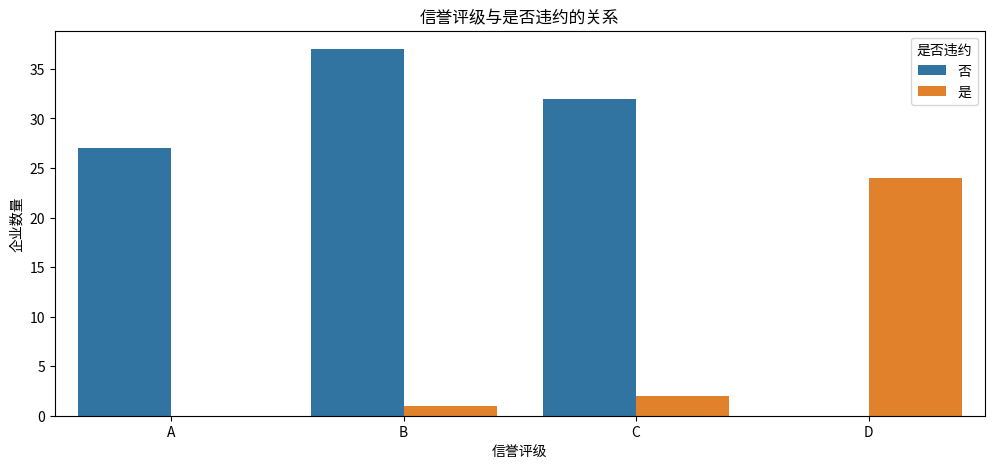

In [6]:
# 查看df_qiyexinxi中信誉评级和是否违约的分布情况，用中文显示

plt.figure(figsize=(12, 5))
# 设置x轴按字母顺序排列
sns.countplot(data=df_qiyexinxi, x='信誉评级', hue='是否违约', order=['A', 'B', 'C', 'D'])
plt.title('信誉评级与是否违约的关系')
plt.xlabel('信誉评级')
plt.ylabel('企业数量')
plt.legend(title='是否违约', loc='upper right')
plt.show()


可见评级越好越不容易违约

接下来关联df_jinxiang 和 df_qiyexinxi进行进一步分析。
用企业代号关联

In [7]:
df_jinxiang = df_jinxiang.merge(df_qiyexinxi[['企业代号', '是否违约']], on='企业代号', how='left')
df_xiaoxiang = df_xiaoxiang.merge(df_qiyexinxi[['企业代号', '是否违约']], on='企业代号', how='left')

In [8]:
df_xiaoxiang.head()  # 显示企业信息表的前几行

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态,是否违约
0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.0,有效发票,否
1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票,否
2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票,否
3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票,否
4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票,否


In [9]:
# 把df_jinxiang和df_xiaoxiang，union all成一个DataFrame，方便后续分析
df_combined = pd.concat([df_jinxiang, df_xiaoxiang], ignore_index=True)

df_combined['单位代号'] = df_combined['销方单位代号'].combine_first(df_combined['购方单位代号']) # 统一单位代号列
df_combined['购销状态'] = np.where(df_combined['购方单位代号'].notnull(), '购方', '销方')
df_combined.head()  # 显示合并后的前几行
# 删除不需要的列
df_combined.drop(columns=['销方单位代号', '购方单位代号'], inplace=True)
df_combined.head()  # 显示合并后的前几行

,企业代号,发票号码,开票日期,金额,税额,价税合计,发票状态,是否违约,单位代号,购销状态
0,E1,3390939,2017-07-18,-943.40,-56.60,-1000.00,有效发票,否,A00297,销方
1,E1,3390940,2017-07-18,-4780.24,-286.81,-5067.05,有效发票,否,A00297,销方
2,E1,3390941,2017-07-18,943.40,56.60,1000.00,有效发票,否,A00297,销方
3,E1,3390942,2017-07-18,4780.24,286.81,5067.05,有效发票,否,A00297,销方
4,E1,9902669,2017-08-07,326.21,9.79,336.00,有效发票,否,A05061,销方


In [10]:
# 处理负数金额
df_combined['发票绝对金额'] = df_combined['金额'].abs()
df_combined['发票类型'] = np.where(df_combined['金额'] > 0, 1, 0)  # 1表示正向发票，0表示负向发票
df_combined['税额绝对金额'] = df_combined['税额'].abs()
df_combined['税额类型'] = np.where(df_combined['税额'] > 0, 1, 0)  # 1表示正向发票，0表示负向发票
df_combined.drop(columns=['金额', '税额'], inplace=True)
df_combined.head()  # 显示处理后的前几行

,企业代号,发票号码,开票日期,价税合计,发票状态,是否违约,单位代号,购销状态,发票绝对金额,发票类型,税额绝对金额,税额类型
0,E1,3390939,2017-07-18,-1000.00,有效发票,否,A00297,销方,943.40,0,56.60,0
1,E1,3390940,2017-07-18,-5067.05,有效发票,否,A00297,销方,4780.24,0,286.81,0
2,E1,3390941,2017-07-18,1000.00,有效发票,否,A00297,销方,943.40,1,56.60,1
3,E1,3390942,2017-07-18,5067.05,有效发票,否,A00297,销方,4780.24,1,286.81,1
4,E1,9902669,2017-08-07,336.00,有效发票,否,A05061,销方,326.21,1,9.79,1


In [11]:
# 检查开票日期格式
df_combined['开票日期'] = pd.to_datetime(df_combined['开票日期'], errors='coerce')
print(df_combined['开票日期'].head())

0   2017-07-18
1   2017-07-18
2   2017-07-18
3   2017-07-18
4   2017-08-07
Name: 开票日期, dtype: datetime64[ns]


In [12]:
# df_combined['是否违约'].value_counts().plot(kind='bar', title='是否违约分布', xlabel='是否违约', ylabel='企业数量', color=['skyblue', 'salmon']) #显示数值
df_combined['是否违约'].value_counts()
# plt.show()

是否违约
否    362144
是     11287
Name: count, dtype: int64

In [13]:

27/(27+96)

0.21951219512195122

In [14]:
df_qiyexinxi['是否违约'].value_counts()  # 显示企业信息表的前几行

是否违约
否    96
是    27
Name: count, dtype: int64

违约公司发票占比很小，3%，但是在公司数量上占比在22%，这就说明大部分违约的公司的流水比较小？

然后看违约发票的公司占比

In [41]:
# --- 最终解决方案 ---

# 1. 清洗 “是否违约” 列 (您已经做过，但为了完整性再写一次)
df_combined['是否违约'] = df_combined['是否违约'].astype(str).str.strip()
mapping = {'是': 1, '1': 1, '否': 0, '0': 0}
df_combined['是否违约'] = df_combined['是否违约'].map(mapping)


# 2. (这是关键的新增步骤) 清洗 “发票状态” 列，去除首尾可能存在的空格
df_combined['发票状态'] = df_combined['发票状态'].str.strip()


# 3. 现在，再次运行您的检查代码，问题应该就解决了
print("--- 单独检查'是否违约'列 ---")
print(df_combined['是否违约'].value_counts())

print("\n--- 组合检查 ---")
print(df_combined[['是否违约', '发票状态']].value_counts())

--- 单独检查'是否违约'列 ---
是否违约
0    362144
1     11287
Name: count, dtype: int64

--- 组合检查 ---
是否违约  发票状态
0     有效发票    344058
      作废发票     18086
1     有效发票     10559
      作废发票       728
Name: count, dtype: int64


In [ ]:
# 不违约的公司的作废发票的比例在5%，违约的在6.5%，区别不明显
print(18086/(18086+344058))
print(728/(10559+728))

0.04994145975081735
0.06449898112873217


In [45]:
# 第1步：按列分组
grouped = df_combined.groupby(['是否违约', '发票状态'])

# 第2步：对每个分组进行计数 (这里用 .size() 更合适)
counts = grouped.size()

# 第3步：手动按计数值进行降序排序
result = counts.sort_values(ascending=False)
result

是否违约  发票状态
0     有效发票    344058
      作废发票     18086
1     有效发票     10559
      作废发票       728
dtype: int64

In [58]:
df_combined['价税合计'] = df_combined['价税合计'].astype(float)
df_combined['价税合计'] 
df_combined[['是否违约', '发票状态', '价税合计']].groupby(['是否违约', '发票状态'])['价税合计'].sum()

是否违约  发票状态
0     作废发票    1.586679e+09
      有效发票    2.522483e+10
1     作废发票    1.821561e+07
      有效发票    2.400858e+08
Name: 价税合计, dtype: float64

In [52]:
# 按是否违约和发票状态分组，统计价税合计
summary = df_combined.groupby(['是否违约', '发票状态']).agg({
    '价税合计': ['sum', 'mean', 'count'],
    '发票绝对金额': ['sum', 'mean'],
    '税额绝对金额': ['sum', 'mean']
})

print(summary)

                   价税合计                              发票绝对金额                \
                    sum          mean   count           sum          mean   
是否违约 发票状态                                                                   
0    作废发票  1.586679e+09  87729.680917   18086  1.432300e+09  79193.826278   
     有效发票  2.522483e+10  73315.626433  344058  2.461824e+10  71552.595175   
1    作废发票  1.821561e+07  25021.445989     728  1.639959e+07  22526.911992   
     有效发票  2.400858e+08  22737.547325   10559  2.240923e+08  21222.867033   

                 税额绝对金额               
                    sum         mean  
是否违约 发票状态                             
0    作废发票  1.714875e+08  9481.780644  
     有效发票  3.296302e+09  9580.656771  
1    作废发票  2.060461e+06  2830.303118  
     有效发票  2.513713e+07  2380.635475  


In [59]:
# 做一个简单的卡方检验 (Chi-squared test) 来验证这一点，它会告诉您“作废发票行为”和“是否违约”这两个变量之间是否存在显著的相关性。
from scipy.stats import chi2_contingency
# 创建一个列联表
contingency_table = pd.crosstab(df_combined['是否违约'], df_combined['发票状态'])
print("\n--- 列联表 ---")
print(contingency_table)
# 进行卡方检验
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\n卡方统计量: {chi2}, p值: {p}")
if p < 0.05:
    print("结论: '作废发票行为' 与 '是否违约' 之间存在显著相关性 (拒绝原假设)") 


--- 列联表 ---
发票状态   作废发票    有效发票
是否违约               
0     18086  344058
1       728   10559

卡方统计量: 48.18086314806598, p值: 3.886630499235356e-12
结论: '作废发票行为' 与 '是否违约' 之间存在显著相关性 (拒绝原假设)
